## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [2]:
import numpy as np
import pandas as pd
import os
import keras

# 請嘗試設定 GPU：os.environ 
#os.environ[ "CUDA_VISIBLE_DEVICES" ] = " "

Using TensorFlow backend.


In [3]:
# 從 Keras 的內建資料集中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data( )

x_train, y_train = train
x_test, y_test = test

print( 'Shape of Train Data : ' + str( x_train.shape ) )
print( 'Shape of Train Label : ' + str( y_train.shape ) + '\n' )

print( 'Shape of Test Data : ' + str( x_test.shape ) )
print( 'Shape of Test Label : ' + str( y_test.shape ) + '\n' )

170500096/170498071 [==============================] - 2s 0us/step
Shape of Train Data : (50000, 32, 32, 3)
Shape of Train Label : (50000, 1)

Shape of Test Data : (10000, 32, 32, 3)
Shape of Test Label : (10000, 1)



In [0]:
## 資料前處理

# 最小最大化
def preproc_x( x, flatten = True ) : 
    minimum = x.min( )
    maximum = x.max( )
    x = 2 * ( x - minimum ) / ( maximum -minimum ) - 1 
    if flatten :
        x = x.reshape( ( len( x ), -1 ) )
    return x

        
# OneHot Encoding
def preproc_y( y, num_classes = 10 ) :
    if y.shape[ -1 ] == 1 :
        y = keras.utils.to_categorical( y, num_classes )
    return y

In [0]:
# Preproc the inputs
x_train = preproc_x( x_train )
x_test = preproc_x( x_test )

# Preprc the outputs
y_train = preproc_y( y_train )
y_test = preproc_y( y_test )

In [6]:
"""Code Here
建立你的神經網路
"""
def build_mlp( input_shape, output_units = 10, num_neurons = [ 512, 256, 256, 128, 128 ] ) : 
    input_layer = keras.layers.Input( input_shape )
    
    for i, n_units in enumerate( num_neurons ) : 
        if i == 0 :
            x = keras.layers.Dense( units = n_units, 
                                    activation = "relu", 
                                    name = "hidden_layer" + str( i+1 ) )( input_layer )
        else:
            x = keras.layers.Dense( units = n_units, 
                                    activation = "relu", 
                                    name = "hidden_layer" + str( i+1 ) )( x )
    
    output_layer = keras.layers.Dense( units = output_units, 
                                       activation = 'softmax', 
                                       name = 'output_layer' )( x )
    
    model = keras.models.Model( inputs = [ input_layer ], outputs = [ output_layer ] )
    return model

model = build_mlp( input_shape = x_train.shape[ 1: ] ) 
model.summary( )

W0714 07:43:20.447916 139943508744064 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0714 07:43:20.487812 139943508744064 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0714 07:43:20.497209 139943508744064 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               65792     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 128)               16512     
_________________________________________________________________
output_layer (Dense)         (None, 10)                1290      
Total para

In [0]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [8]:
optimizer = keras.optimizers.Adam( lr = LEARNING_RATE )

model.compile( loss = 'categorical_crossentropy', 
               optimizer = optimizer , 
               metrics = [ 'accuracy' ] 
               )

W0714 07:43:20.631520 139943508744064 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0714 07:43:20.644814 139943508744064 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [9]:
model.fit( x_train, y_train, 
           epochs = EPOCHS, 
           batch_size = BATCH_SIZE, 
           validation_data = ( x_test, y_test ), 
           shuffle = True 
           )

W0714 07:43:20.797559 139943508744064 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0714 07:43:20.867817 139943508744064 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 16s 329us/step - loss: 2.2254 - acc: 0.1630 - val_loss: 2.1686 - val_acc: 0.1982
Epoch 2/100
50000/50000 [==============================] - 16s 317us/step - loss: 2.1142 - acc: 0.2227 - val_loss: 2.1278 - val_acc: 0.2133
Epoch 3/100
50000/50000 [==============================] - 16s 313us/step - loss: 2.0375 - acc: 0.2600 - val_loss: 2.0507 - val_acc: 0.2483
Epoch 4/100
50000/50000 [==============================] - 16s 312us/step - loss: 1.9881 - acc: 0.2799 - val_loss: 2.0618 - val_acc: 0.2477
Epoch 5/100
50000/50000 [==============================] - 16s 316us/step - loss: 1.9559 - acc: 0.2936 - val_loss: 1.9807 - val_acc: 0.2803
Epoch 6/100
50000/50000 [==============================] - 16s 315us/step - loss: 1.9281 - acc: 0.3034 - val_loss: 2.0225 - val_acc: 0.2695
Epoch 7/100
50000/50000 [==============================] - 16s 318us/step - loss: 1.8952 - acc: 0.3188 - val_l

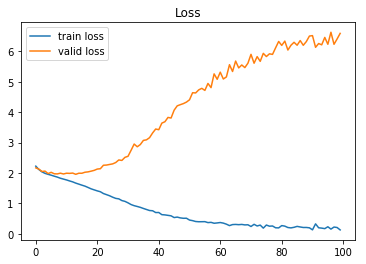

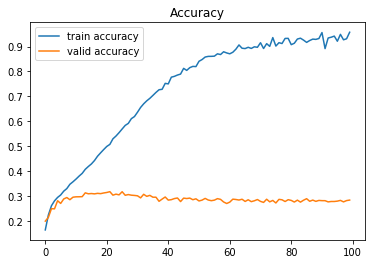

In [10]:
import matplotlib.pyplot as plt


train_loss = model.history.history[ 'loss' ]
valid_loss = model.history.history[ 'val_loss' ]

train_acc = model.history.history[ 'acc' ]
valid_acc = model.history.history[ 'val_acc' ]

plt.plot( range( len( train_loss ) ), train_loss, label = 'train loss' )
plt.plot( range( len( valid_loss ) ), valid_loss, label = 'valid loss' )
plt.legend( )
plt.title( 'Loss' )
plt.show( )

plt.plot( range( len( train_acc ) ), train_acc, label = 'train accuracy' )
plt.plot( range( len( valid_acc ) ), valid_acc, label = 'valid accuracy' )
plt.legend( )
plt.title( 'Accuracy' )
plt.show( )